# EDA(Ames Housing dataset)


In [46]:
!pip install pandoc

In [ ]:
winget install pandoc

# 1.0 Importing libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


pd.set_option('display.max_columns',500)


IMPORTING DATASET

In [10]:
from sklearn.datasets import fetch_openml
housing=fetch_openml(name="house_prices",as_frame=True)
df=housing['data']
df['SalePrice']=housing['target']
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1.0        60.0       RL         65.0   8450.0   Pave  None      Reg   
1  2.0        20.0       RL         80.0   9600.0   Pave  None      Reg   
2  3.0        60.0       RL         68.0  11250.0   Pave  None      IR1   
3  4.0        70.0       RL         60.0   9550.0   Pave  None      IR1   
4  5.0        60.0       RL         84.0  14260.0   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story          7.0          5.0     2003.0   
1       Norm     1Fam     1Story          6.0          8.0     1976.0   
2       Norm     1Fam     2Story          7.0          5.0     2001.0   
3       Norm     1Fam     2Story          7.0          5.0     1915.0   
4       Norm     1Fam     2Story          8.0          5.0     2000.0   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0        2003.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1        1976.0     Gable  CompShg     MetalSd     MetalSd       None   
2        2002.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3        1970.0     Gable  CompShg     Wd Sdng     Wd Shng       None   
4        2000.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr     856.0     854.0           0.0   
1    GasA        Ex          Y      SBrkr    1262.0       0.0           0.0   
2    GasA        Ex          Y      SBrkr     920.0     866.0           0.0   
3    GasA        Gd          Y      SBrkr     961.0     756.0           0.0   
4    GasA        Ex          Y      SBrkr    1145.0    1053.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0           1.0           0.0       2.0       1.0           3.0   
1     1262.0           0.0           1.0       2.0       0.0           3.0   
2     1786.0           1.0           0.0       2.0       1.0           3.0   
3     1717.0           1.0           0.0       1.0       0.0           3.0   
4     2198.0           1.0           0.0       2.0       1.0           4.0   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0           1.0          Gd           8.0        Typ         0.0        None   
1           1.0          TA           6.0        Typ         1.0          TA   
2           1.0          Gd           6.0        Typ         1.0          TA   
3           1.0          Gd       

In [11]:
df.shape

(1460, 81)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   float64
 18  OverallC

# Observation

1.Dataset have 81 features and 1460 rows

2.two types of data present 43 features have object datatype and 38 feature have float64 datatype

3.total 18 feature have missing values

# 3.0 Basics info about dataset and its attribute

MSSubClass: Identifies the type of dwelling involved in the sale.

    
    20	1-STORY 1946 & NEWER ALL STYLES
    30	1-STORY 1945 & OLDER
    40	1-STORY W/FINISHED ATTIC ALL AGES
    45	1-1/2 STORY - UNFINISHED ALL AGES
    50	1-1/2 STORY FINISHED ALL AGES
    60	2-STORY 1946 & NEWER
    70	2-STORY 1945 & OLDER
    75	2-1/2 STORY ALL AGES
    80	SPLIT OR MULTI-LEVEL
    85	SPLIT FOYER
    90	DUPLEX - ALL STYLES AND AGES
   120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
   150	1-1/2 STORY PUD - ALL AGES
   160	2-STORY PUD - 1946 & NEWER
   180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
   190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale. A Agriculture C Commercial FV Floating Village Residential I Industrial RH Residential High Density RL Residential Low Density RP Residential Low Density Park RM Residential Medium Density
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

   Grvl	Gravel	
   Pave	Paved
   	
Alley: Type of alley access to property

   Grvl	Gravel
   Pave	Paved
   NA 	No alley access
	
LotShape: General shape of property

   Reg	Regular	
   IR1	Slightly irregular
   IR2	Moderately Irregular
   IR3	Irregular

LandContour: Flatness of the property

   Lvl	Near Flat/Level	
   Bnk	Banked - Quick and significant rise from street grade to building
   HLS	Hillside - Significant slope from side to side
   Low	Depression
	
Utilities: Type of utilities available AllPub All public Utilities (E,G,W,& S) NoSewr Electricity, Gas, and Water (Septic Tank) NoSeWa Electricity and Gas Only ELO Electricity only
LotConfig: Lot configuration

   Inside	Inside lot
   Corner	Corner lot
   CulDSac	Cul-de-sac
   FR2	Frontage on 2 sides of property
   FR3	Frontage on 3 sides of property
LandSlope: Slope of property Gtl Gentle slope Mod Moderate Slope Sev Severe Slope
Neighborhood: Physical locations within Ames city limits

   Blmngtn	Bloomington Heights
   Blueste	Bluestem
   BrDale	Briardale
   BrkSide	Brookside
   ClearCr	Clear Creek
   CollgCr	College Creek
   Crawfor	Crawford
   Edwards	Edwards
   Gilbert	Gilbert
   IDOTRR	Iowa DOT and Rail Road
   MeadowV	Meadow Village
   Mitchel	Mitchell
   Names	North Ames
   NoRidge	Northridge
   NPkVill	Northpark Villa
   NridgHt	Northridge Heights
   NWAmes	Northwest Ames
   OldTown	Old Town
   SWISU	South & West of Iowa State University
   Sawyer	Sawyer
   SawyerW	Sawyer West
   Somerst	Somerset
   StoneBr	Stone Brook
   Timber	Timberland
   Veenker	Veenker
		
Condition1: Proximity to various conditions
Artery Adjacent to arterial street Feedr Adjacent to feeder street Norm Normal RRNn Within 200' of North-South Railroad RRAn Adjacent to North-South Railroad PosN Near positive off-site feature--park, greenbelt, etc. PosA Adjacent to postive off-site feature RRNe Within 200' of East-West Railroad RRAe Adjacent to East-West Railroad
Condition2: Proximity to various conditions (if more than one is present) Artery Adjacent to arterial street Feedr Adjacent to feeder street Norm Normal RRNn Within 200' of North-South Railroad RRAn Adjacent to North-South Railroad PosN Near positive off-site feature--park, greenbelt, etc. PosA Adjacent to postive off-site feature RRNe Within 200' of East-West Railroad RRAe Adjacent to East-West Railroad
BldgType: Type of dwelling 1Fam Single-family Detached 2FmCon Two-family Conversion; originally built as one-family dwelling Duplx Duplex TwnhsE Townhouse End Unit TwnhsI Townhouse Inside Unit
HouseStyle: Style of dwelling
1Story One story 1.5Fin One and one-half story: 2nd level finished 1.5Unf One and one-half story: 2nd level unfinished 2Story Two story 2.5Fin Two and one-half story: 2nd level finished 2.5Unf Two and one-half story: 2nd level unfinished SFoyer Split Foyer SLvl Split Level
OverallQual: Rates the overall material and finish of the house

   10	Very Excellent
   9	Excellent
   8	Very Good
   7	Good
   6	Above Average
   5	Average
   4	Below Average
   3	Fair
   2	Poor
   1	Very Poor
OverallCond: Rates the overall condition of the house

   10	Very Excellent
   9	Excellent
   8	Very Good
   7	Good
   6	Above Average	
   5	Average
   4	Below Average	
   3	Fair
   2	Poor
   1	Very Poor
	
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

   Flat	Flat
   Gable	Gable
   Gambrel	Gabrel (Barn)
   Hip	Hip
   Mansard	Mansard
   Shed	Shed
	
RoofMatl: Roof material

   ClyTile	Clay or Tile
   CompShg	Standard (Composite) Shingle
   Membran	Membrane
   Metal	Metal
   Roll	Roll
   Tar&Grv	Gravel & Tar
   WdShake	Wood Shakes
   WdShngl	Wood Shingles
	
Exterior1st: Exterior covering on house

   AsbShng	Asbestos Shingles
   AsphShn	Asphalt Shingles
   BrkComm	Brick Common
   BrkFace	Brick Face
   CBlock	Cinder Block
   CemntBd	Cement Board
   HdBoard	Hard Board
   ImStucc	Imitation Stucco
   MetalSd	Metal Siding
   Other	Other
   Plywood	Plywood
   PreCast	PreCast	
   Stone	Stone
   Stucco	Stucco
   VinylSd	Vinyl Siding
   Wd Sdng	Wood Siding
   WdShing	Wood Shingles
Exterior2nd: Exterior covering on house (if more than one material)

   AsbShng	Asbestos Shingles
   AsphShn	Asphalt Shingles
   BrkComm	Brick Common
   BrkFace	Brick Face
   CBlock	Cinder Block
   CemntBd	Cement Board
   HdBoard	Hard Board
   ImStucc	Imitation Stucco
   MetalSd	Metal Siding
   Other	Other
   Plywood	Plywood
   PreCast	PreCast
   Stone	Stone
   Stucco	Stucco
   VinylSd	Vinyl Siding
   Wd Sdng	Wood Siding
   WdShing	Wood Shingles
MasVnrType: Masonry veneer type

   BrkCmn	Brick Common
   BrkFace	Brick Face
   CBlock	Cinder Block
   None	None
   Stone	Stone
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior Ex Excellent Gd Good TA Average/Typical Fa Fair Po Poor ExterCond: Evaluates the present condition of the material on the exterior Ex Excellent Gd Good TA Average/Typical Fa Fair Po Poor Foundation: Type of foundation BrkTil Brick & Tile CBlock Cinder Block PConc Poured Contrete Slab Slab Stone Stone Wood Wood BsmtQual: Evaluates the height of the basement

   Ex	Excellent (100+ inches)	
   Gd	Good (90-99 inches)
   TA	Typical (80-89 inches)
   Fa	Fair (70-79 inches)
   Po	Poor (<70 inches
   NA	No Basement
	
BsmtCond: Evaluates the general condition of the basement

   Ex	Excellent
   Gd	Good
   TA	Typical - slight dampness allowed
   Fa	Fair - dampness or some cracking or settling
   Po	Poor - Severe cracking, settling, or wetness
   NA	No Basement
BsmtExposure: Refers to walkout or garden level walls

   Gd	Good Exposure
   Av	Average Exposure (split levels or foyers typically score average or above)	
   Mn	Mimimum Exposure
   No	No Exposure
   NA	No Basement
BsmtFinType1: Rating of basement finished area

   GLQ	Good Living Quarters
   ALQ	Average Living Quarters
   BLQ	Below Average Living Quarters	
   Rec	Average Rec Room
   LwQ	Low Quality
   Unf	Unfinshed
   NA	No Basement
	
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

   GLQ	Good Living Quarters
   ALQ	Average Living Quarters
   BLQ	Below Average Living Quarters	
   Rec	Average Rec Room
   LwQ	Low Quality
   Unf	Unfinshed
   NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating Floor Floor Furnace GasA Gas forced warm air furnace GasW Gas hot water or steam heat Grav Gravity furnace OthW Hot water or steam heat other than gas Wall Wall furnace HeatingQC: Heating quality and condition

   Ex	Excellent
   Gd	Good
   TA	Average/Typical
   Fa	Fair
   Po	Poor
	
CentralAir: Central air conditioning

   N	No
   Y	Yes
	
Electrical: Electrical system

   SBrkr	Standard Circuit Breakers & Romex
   FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
   FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
   FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
   Mix	Mixed
	
1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

   Ex	Excellent
   Gd	Good
   TA	Typical/Average
   Fa	Fair
   Po	Poor
   	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

   Typ	Typical Functionality
   Min1	Minor Deductions 1
   Min2	Minor Deductions 2
   Mod	Moderate Deductions
   Maj1	Major Deductions 1
   Maj2	Major Deductions 2
   Sev	Severely Damaged
   Sal	Salvage only
	
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

   Ex	Excellent - Exceptional Masonry Fireplace
   Gd	Good - Masonry Fireplace in main level
   TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
   Fa	Fair - Prefabricated Fireplace in basement
   Po	Poor - Ben Franklin Stove
   NA	No Fireplace
	
GarageType: Garage location 2Types More than one type of garage Attchd Attached to home Basment Basement Garage BuiltIn Built-In (Garage part of house - typically has room above garage) CarPort Car Port Detchd Detached from home NA No Garage GarageYrBlt: Year garage was built GarageFinish: Interior finish of the garage

   Fin	Finished
   RFn	Rough Finished	
   Unf	Unfinished
   NA	No Garage
	
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

   Ex	Excellent
   Gd	Good
   TA	Typical/Average
   Fa	Fair
   Po	Poor
   NA	No Garage
	
GarageCond: Garage condition

   Ex	Excellent
   Gd	Good
   TA	Typical/Average
   Fa	Fair
   Po	Poor
   NA	No Garage
	
PavedDrive: Paved driveway

   Y	Paved 
   P	Partial Pavement
   N	Dirt/Gravel
	
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality Ex Excellent Gd Good TA Average/Typical Fa Fair NA No Pool Fence: Fence quality GdPrv Good Privacy MnPrv Minimum Privacy GdWo Good Wood MnWw Minimum Wood/Wire NA No Fence
MiscFeature: Miscellaneous feature not covered in other categories Elev Elevator Gar2 2nd Garage (if not described in garage section) Othr Other Shed Shed (over 100 SF) TenC Tennis Court NA None MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale WD Warranty Deed - Conventional CWD Warranty Deed - Cash VWD Warranty Deed - VA Loan New Home just constructed and sold COD Court Officer Deed/Estate Con Contract 15% Down payment regular terms ConLw Contract Low Down payment and low interest ConLI Contract Low Interest ConLD Contract Low Down Oth Other SaleCondition: Condition of sale

   Normal	Normal Sale
   Abnorml	Abnormal Sale -  trade, foreclosure, short sale
   AdjLand	Adjoining Land Purchase
   Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
   Family	Sale between family members
  
  Partial	Home was not completed when last assessed (associated with New Homes)

# 4.0 Checking missing values

In [12]:
feature_containingNAN=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_containingNAN:
    print("{} has {} percent of missing values".format(feature,round(df[feature].isnull().mean()*100,4)))

LotFrontage has 17.7397 percent of missing values
Alley has 93.7671 percent of missing values
MasVnrType has 0.5479 percent of missing values
MasVnrArea has 0.5479 percent of missing values
BsmtQual has 2.5342 percent of missing values
BsmtCond has 2.5342 percent of missing values
BsmtExposure has 2.6027 percent of missing values
BsmtFinType1 has 2.5342 percent of missing values
BsmtFinType2 has 2.6027 percent of missing values
FireplaceQu has 47.2603 percent of missing values
GarageType has 5.5479 percent of missing values
GarageYrBlt has 5.5479 percent of missing values
GarageFinish has 5.5479 percent of missing values
GarageQual has 5.5479 percent of missing values
GarageCond has 5.5479 percent of missing values
PoolQC has 99.5205 percent of missing values
Fence has 80.7534 percent of missing values
MiscFeature has 96.3014 percent of missing values


# Observation

1.LotFrontage has 17 percentage missing value which is managebale

2.alley.PoolQC and MiscFeature have more than 90 percent of missing value 

3.fireplaceQC and fence has 47 and 80 percent respectively

4.All other feature containing missing value have less than 6 percent missing value

# 5.0 Categorical feature 

In [15]:
###categorical feature 
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print("there are {} categorical feature and their name are {}".format(len(categorical_features), categorical_features))

there are 43 categorical feature and their name are ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# 5.1 Categories in Each Feature

In [16]:
for feature in categorical_features:
    print("{} has {} unique features,namely{}".format(feature,len(list(df[feature].unique())),list(df[feature].unique())))

MSZoning has 5 unique features,namely['RL', 'RM', 'C (all)', 'FV', 'RH']
Street has 2 unique features,namely['Pave', 'Grvl']
Alley has 3 unique features,namely[None, 'Grvl', 'Pave']
LotShape has 4 unique features,namely['Reg', 'IR1', 'IR2', 'IR3']
LandContour has 4 unique features,namely['Lvl', 'Bnk', 'Low', 'HLS']
Utilities has 2 unique features,namely['AllPub', 'NoSeWa']
LotConfig has 5 unique features,namely['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
LandSlope has 3 unique features,namely['Gtl', 'Mod', 'Sev']
Neighborhood has 25 unique features,namely['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Condition1 has 9 unique features,namely['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Condition2 has 8 unique features,namely['Norm', 'Artery'

# Observation

1. there are 3 feature having more than 15 categories

2. 17 feature that have more than 5 and less than 10 categories

3. 23 feature has less than 5 categories

# 5.2 count of observation in categories in each feature

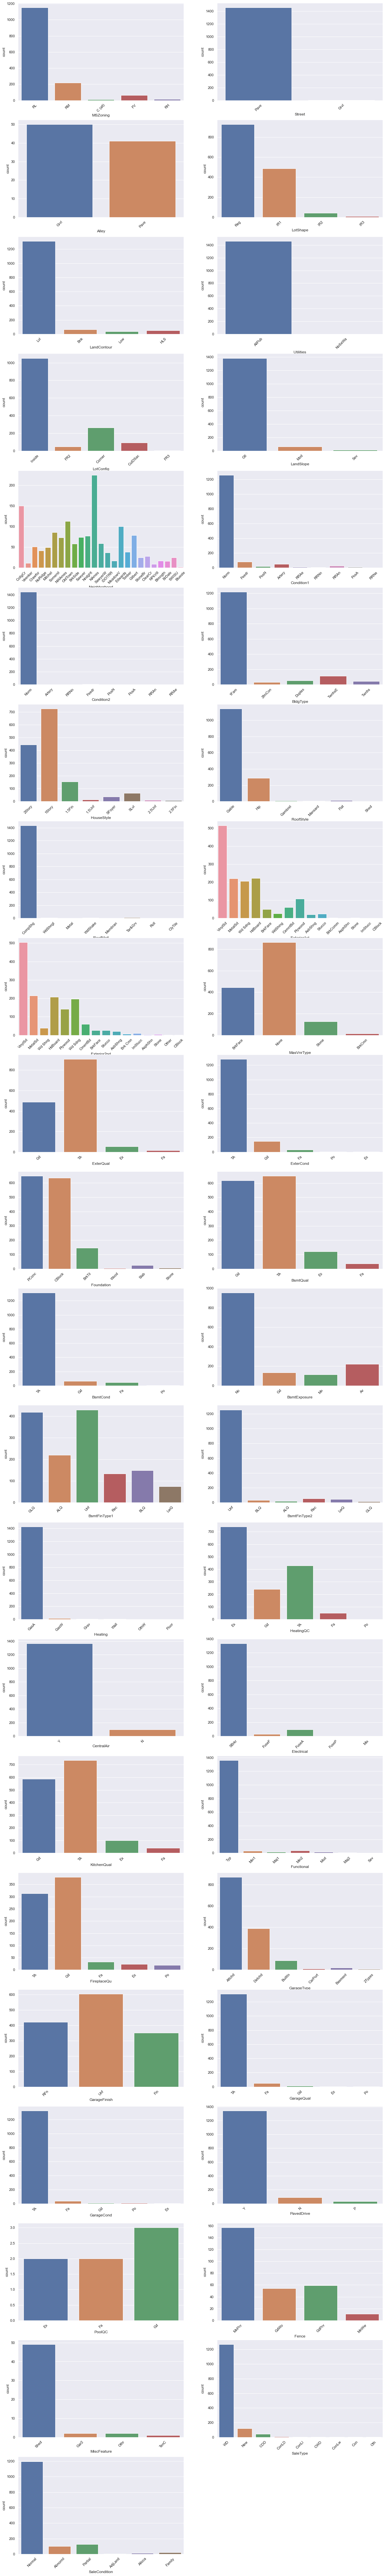

In [19]:
plt.figure(figsize=(20,150))
for i in enumerate(categorical_features):
    plt.subplot(23,2,i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.countplot(data=df,x=i[1])
    plt.xticks(rotation=45)

# Observation

1.Almost all categorical features have imbalance data.

2.MSZoning, Street, LandContour, Utilities, LotConfig, LandSlope, Condition1, Condition2, BldgType, HouseStyle, RoofStyle,

RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure,

BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageQual,

GarageCond, PavedDrive, Fence, MiscFeature, SaleType, SaleCondition.

All these features have categories which has less no of observations and hence can be placed in new category called Rare.

# 5.3 Categories in each feature VS Sales Price

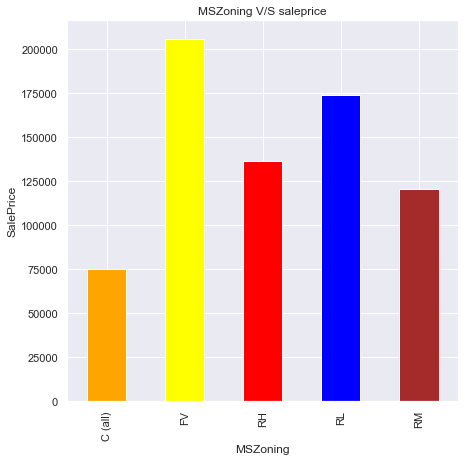

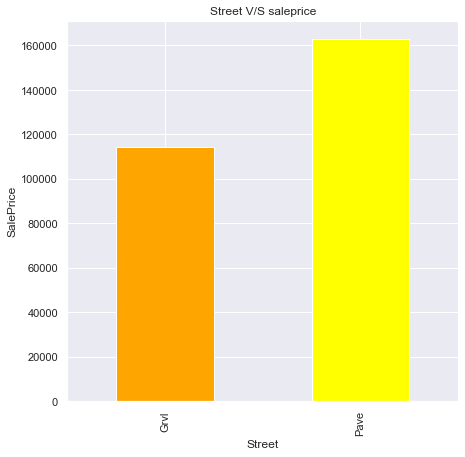

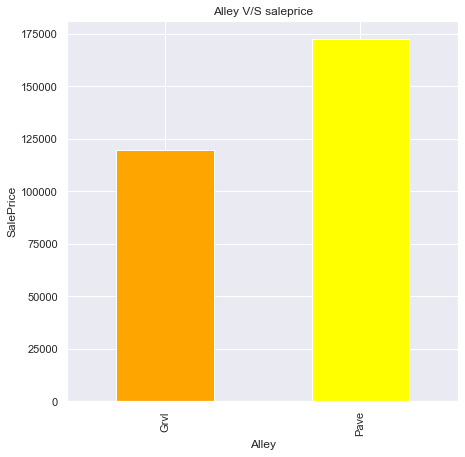

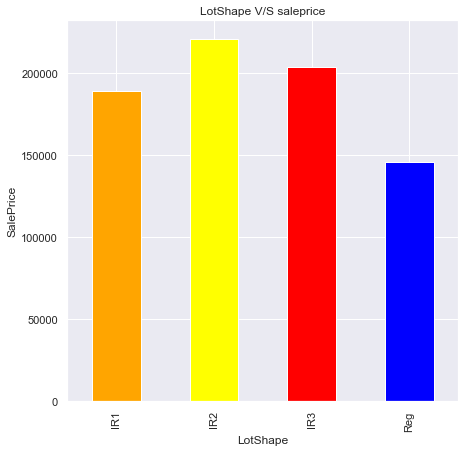

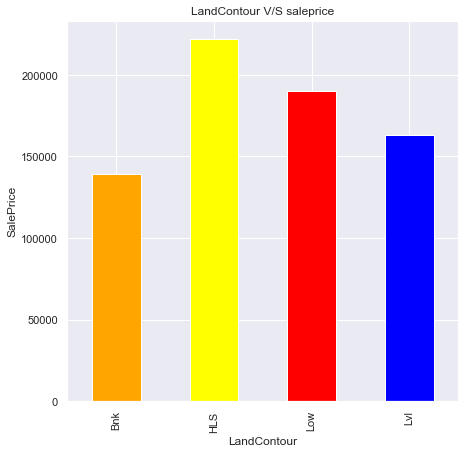

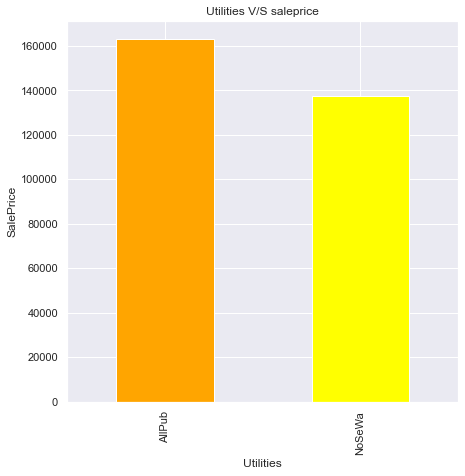

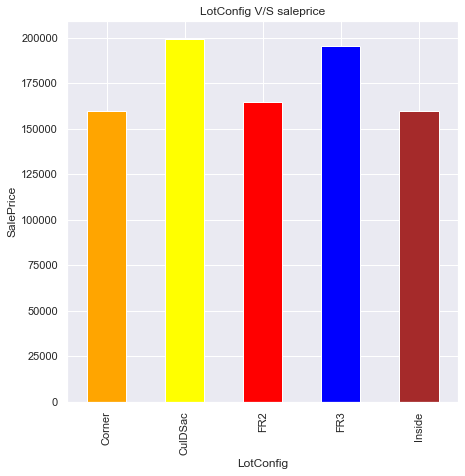

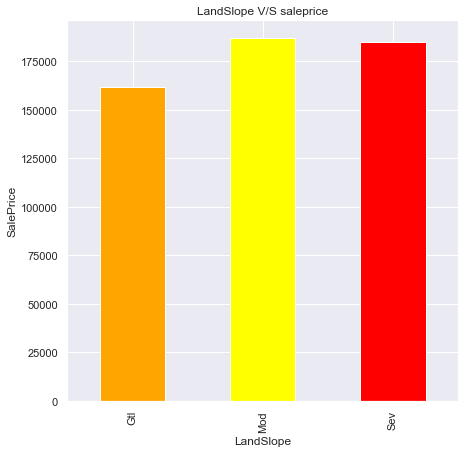

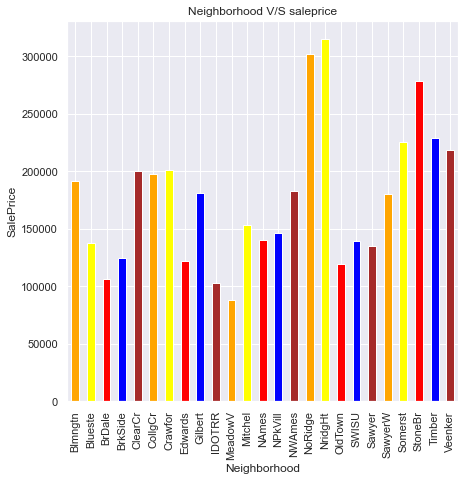

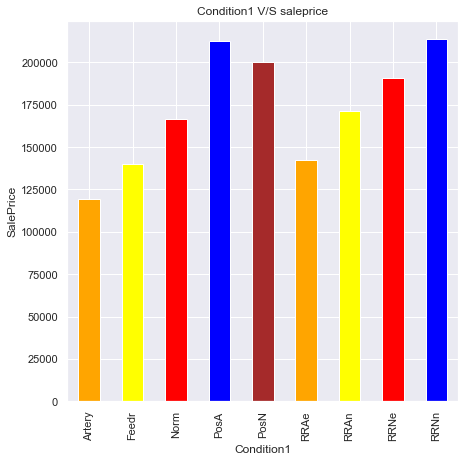

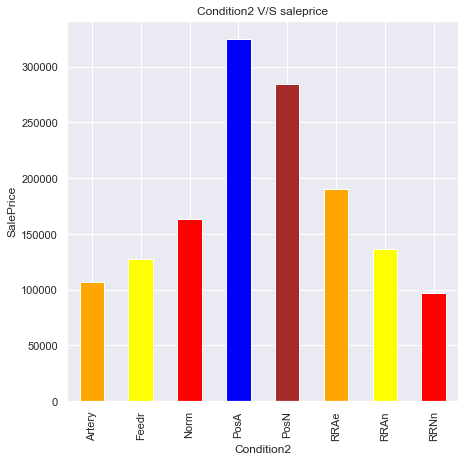

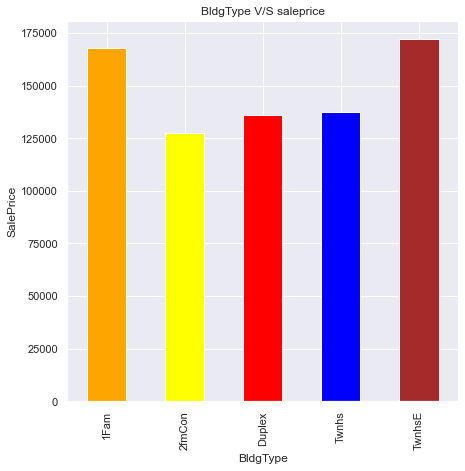

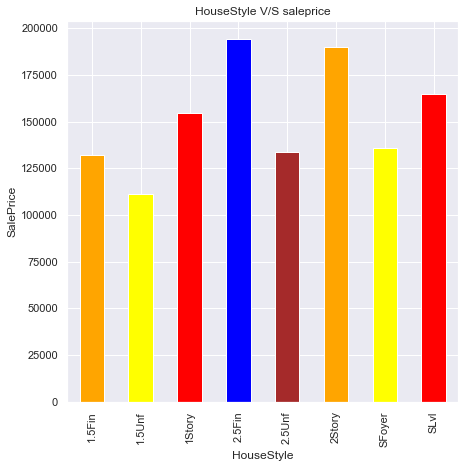

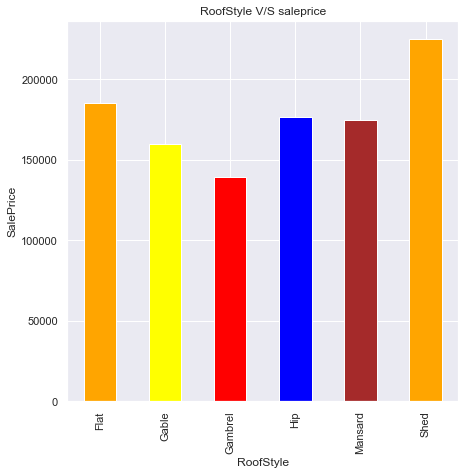

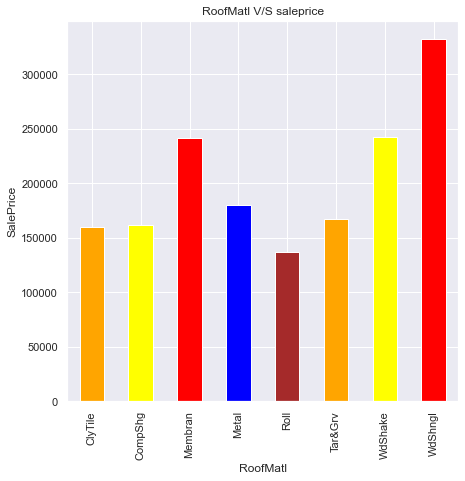

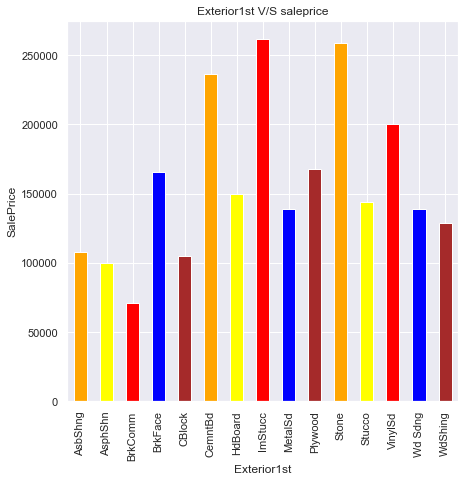

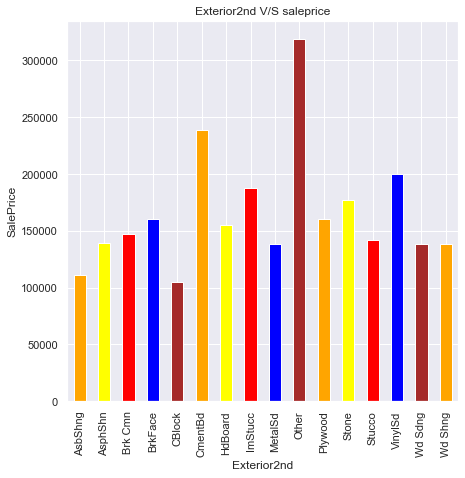

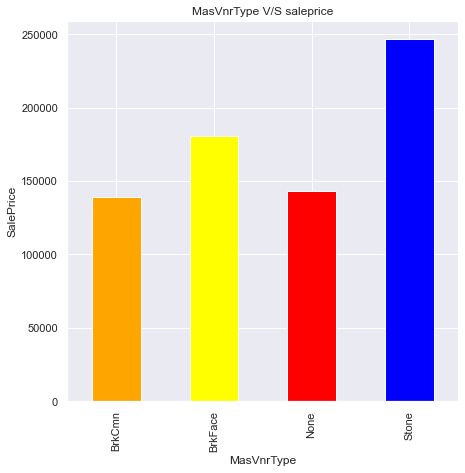

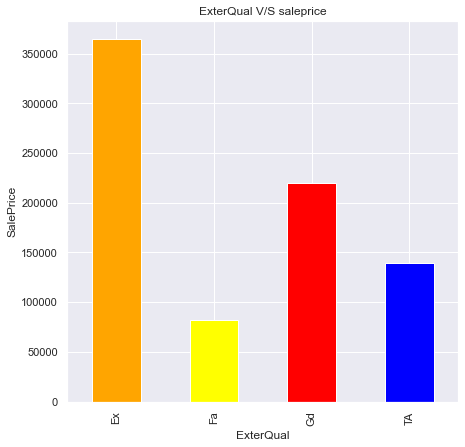

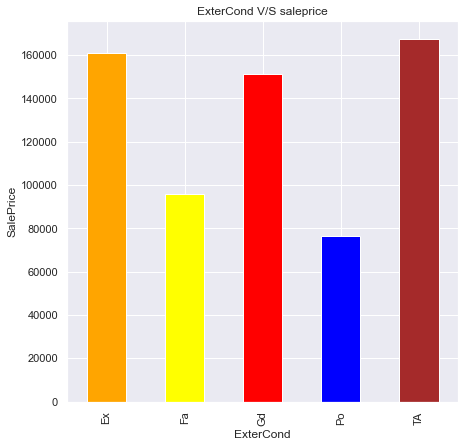

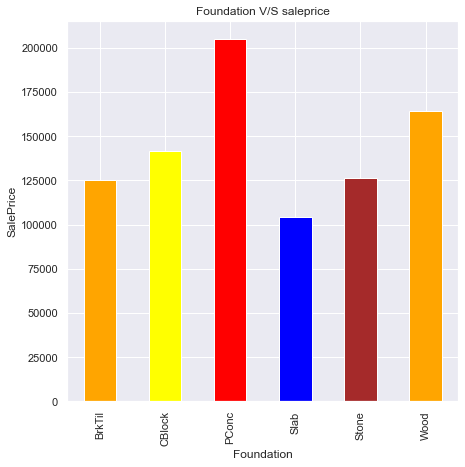

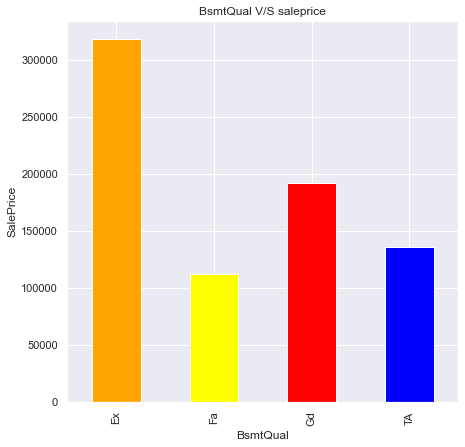

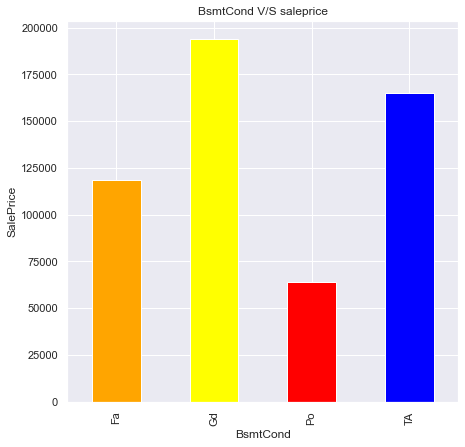

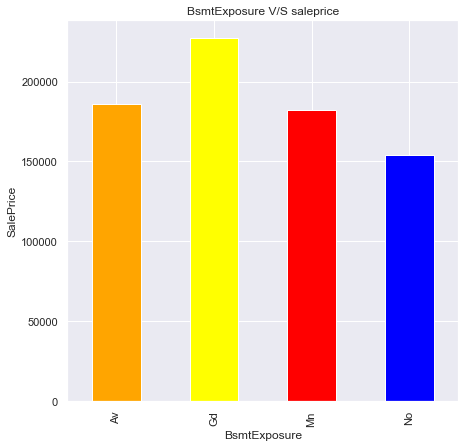

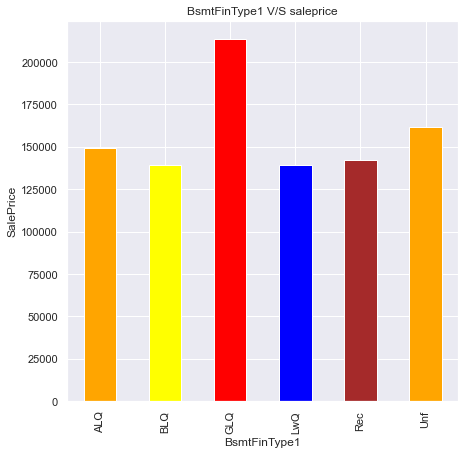

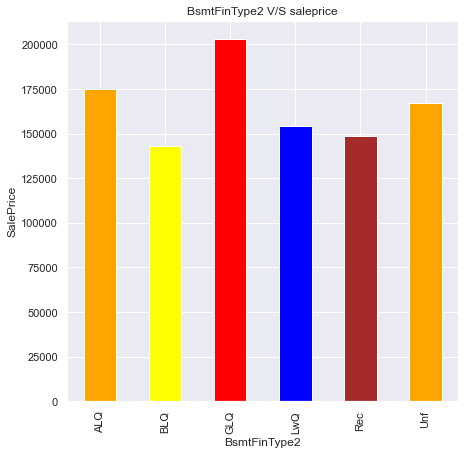

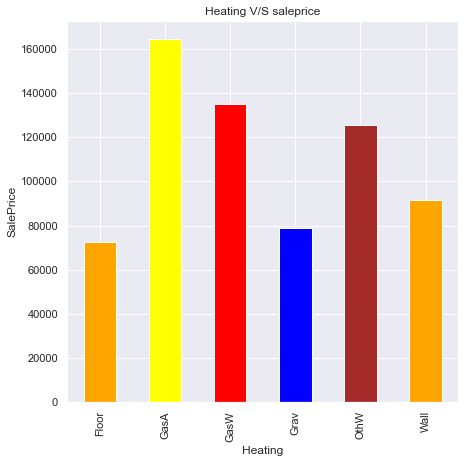

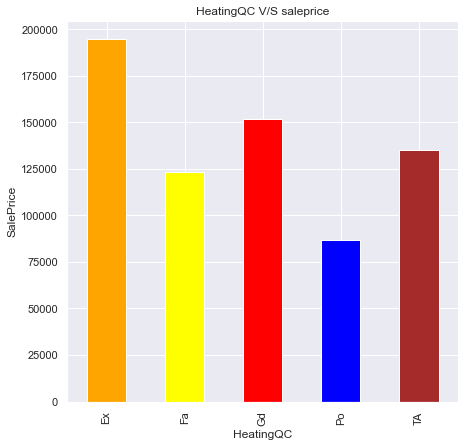

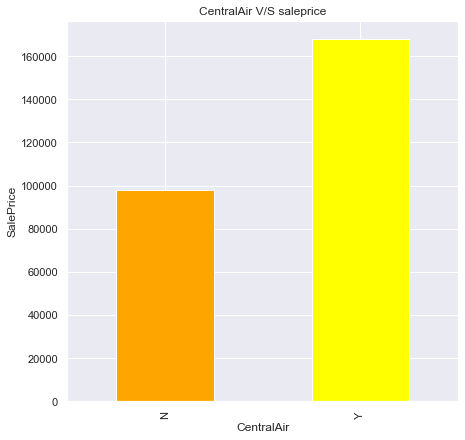

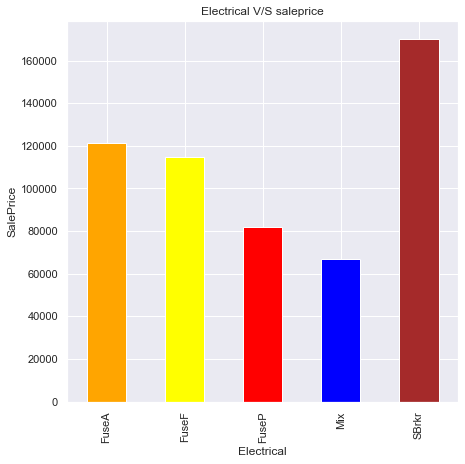

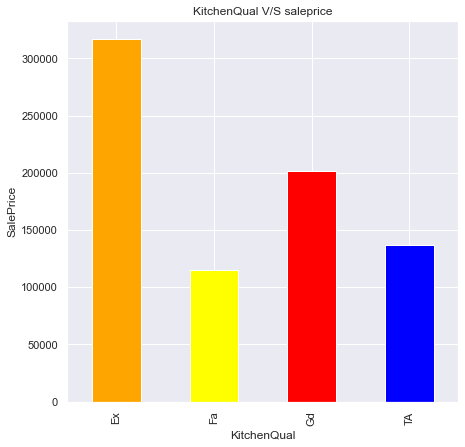

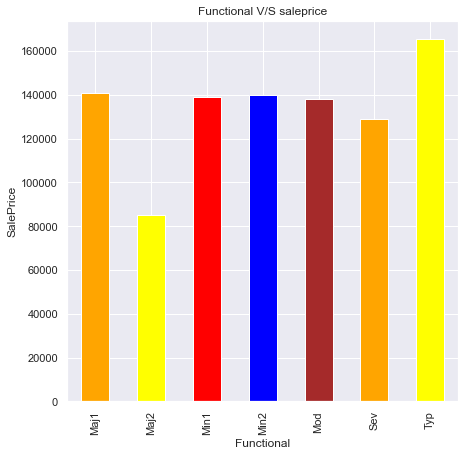

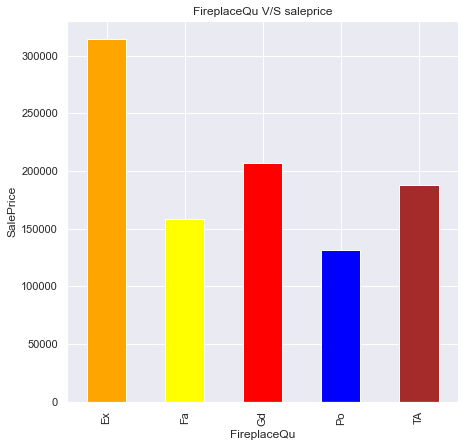

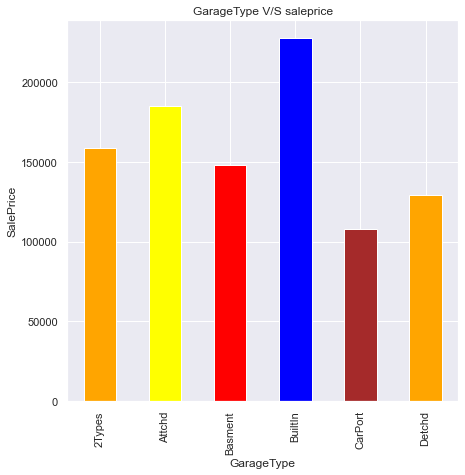

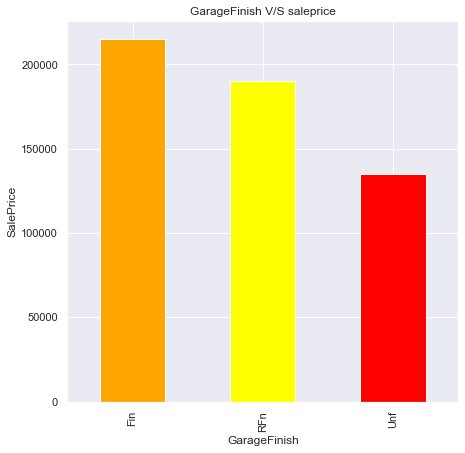

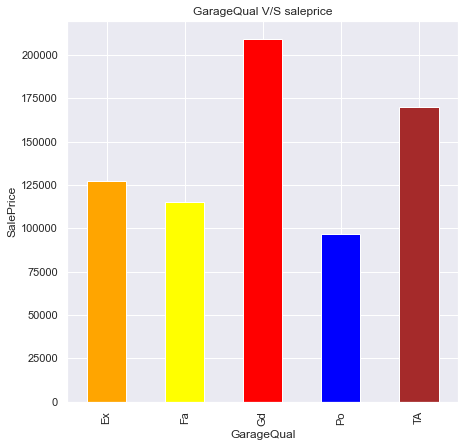

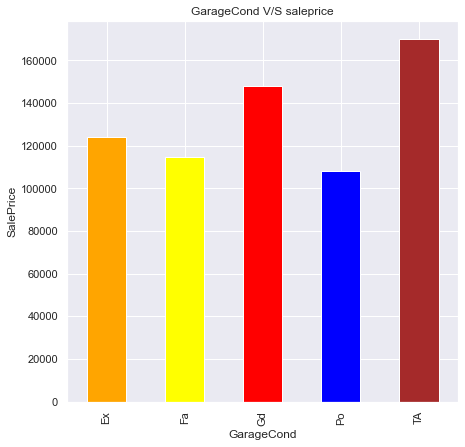

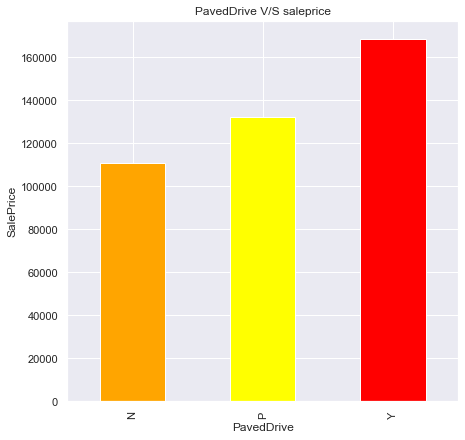

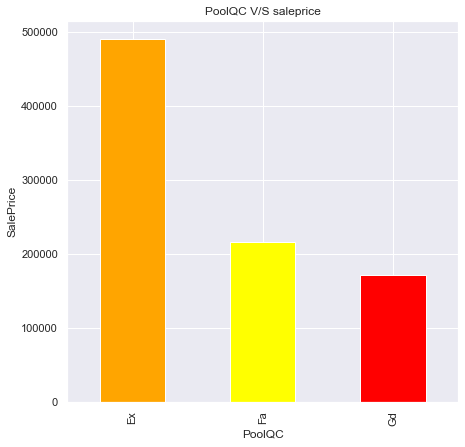

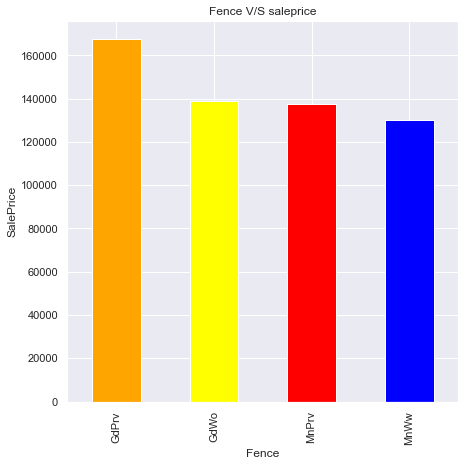

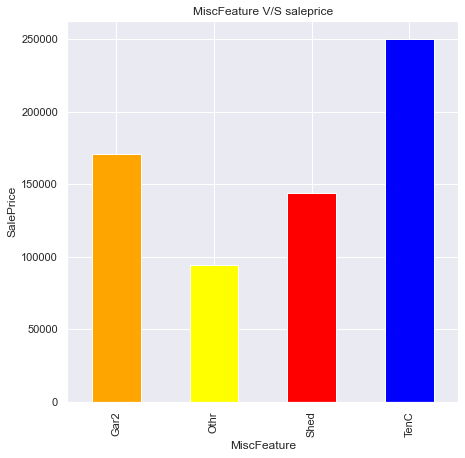

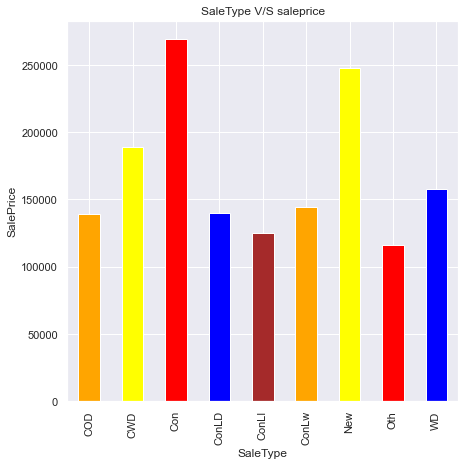

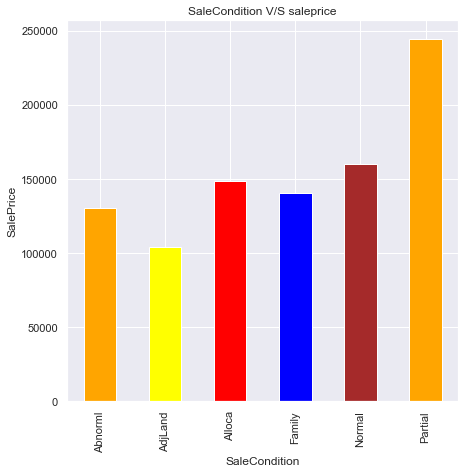

In [21]:
for feature in categorical_features:
    df.groupby(feature)['SalePrice'].median().plot.bar(color=['orange','yellow','red','blue','brown'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title("{} V/S saleprice".format(feature))
    plt.show();

# Observation

1.For MSZoning, Floating Village Residential zone has highest median value whereas Commercial has least. Median values for other categories is comparable.

2.For Street, Paved street has highest median value whereas Gravel street has least.

3.For alley, Paved alley has highest median value whereas Gravel alley has least.

4.For LotShape, Moderately Irregular has highest median value whereas Regular has least. Median values for other categories is comparable.
5.For Land Contour, Hillside - Significant slope from side to side has highest median value whereas Banked - Quick and significant rise from street grade to building has least. Median values for other categories is comparable.

6.For Utilities, All public Utilities has highest median value whereas Electricity and Gas Only has least.

7.For LotConfig, Cul-de-sac has highest median value whereas Corner lot has least. Median values for other categories is comparable.

8.For LandSlope, Moderate Slope has highest median value whereas Gentle slope has least. Median values for other categories is comparable.

9.For Neighborhood, Northridge Heights has highest median value whereas Meadow Village has least. Median values for other categories is comparable.

10.For Condition1, Adjacent to postive off-site feature has highest median value whereas Adjacent to arterial street has least. Median values for other categories is comparable.

11.For Condition2, Adjacent to postive off-site feature has highest median value whereas Within 200' of North-South Railroad has least. Median values for other categories is comparable.

12.For BldgType, Townhouse End Unit has highest median value whereas Two-family Conversion has least. Median values for other categories is comparable.

13.For HouseStyle, Two and one-half story: 2nd level finished has highest median value whereas One and one-half story: 2nd level unfinished has least. Median values for other categories is comparable.

14.For RoofStyle, Floating Village Residential zone has highest median value whereas Commercial has least. Median values for other categories is comparable.

15.For RoofStyle, Shed has highest median value whereas Gabrel (Barn) has least. Median values for other categories is comparable.

16.For RoofMatl, Wood Shingles has highest median value whereas Roll has least. Median values for other categories is comparable.

17.For Exterior1st, Imitation Stucco has highest median value whereas Brick Common has least. Median values for other categories is comparable.

18.For Exterior2nd, Other has highest median value whereas Cinder Block has least. Median values for other categories is comparable.

19.For MasVnrType, Stone has highest median value whereas Brick Common has least. Median values for other categories is comparable.

20.For ExterQual, Excellent has highest median value whereas Fair has least. Median values for other categories is comparable.

21.For ExterCond, Average/Typical has highest median value whereas Poor has least. Median values for other categories is comparable.

22.For Foundation, Poured Contrete has highest median value whereas Slab has least. Median values for other categories is comparable.

23.For BsmtQual, Excellent (100+ inches) has highest median value whereas Fair (70-79 inches) has least. Median values for other categories is comparable.

24.For BsmtCond, Good has highest median value whereas Poor - Severe cracking, settling, or wetness has least. Median values for other categories is comparable.

25.For BsmtExposure, Good Exposure has highest median value whereas No Exposure has least. Median values for other categories is comparable.

26.For Heating, Gas forced warm air furnace has highest median value whereas Floor Furnace has least. Median values for other categories is comparable.

27.For CentralAir, Yes has highest median value whereas No has least. Median values for other categories is comparable.

28.For Electrical, Standard Circuit Breakers & Romex has highest median value whereas Mixed has least. Median values for other categories is comparable.

29.For KitchenQual, Excellent has highest median value whereas Fair has least. Median values for other categories is comparable.

30.For Functional, Typical Functionality has highest median value whereas Major Deductions 2 has least. Median values for other categories is comparable.

31.For GarageType, Built-In has highest median value whereas Car Port has least. Median values for other categories is comparable.

32.For PavedDrive, Partial Pavement has highest median value whereas Dirt/Gravel has least. Median values for other categories is comparable.

33.For PoolQC, Excellent has highest median value whereas Good has least. Median values for other categories is comparable.

34.For Fence, Good Privacy has highest median value whereas Minimum Wood/Wire has least. Median values for other categories is comparable.

35.For MiscFeature, Tennis Court has highest median value whereas Other has least. Median values for other categories is comparable.

36.For SaleType, Contract 15% Down payment regular terms has highest median value whereas Other has least. Median values for other categories is comparable.

37.For SaleCondition, Home was not completed when last assessed (associated with New Homes) has highest median value whereas Allocation - two linked properties with separate deeds, typically condo with a garage unit has least. Median values for other categories is comparable.

# 6.0 Numerical feature

In [22]:
##getting numerical feature excluding datetime features
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
##getting datetime features

year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature ]
len(numerical_features)

38

# 6.1 Checking Distribution of numerical feature 

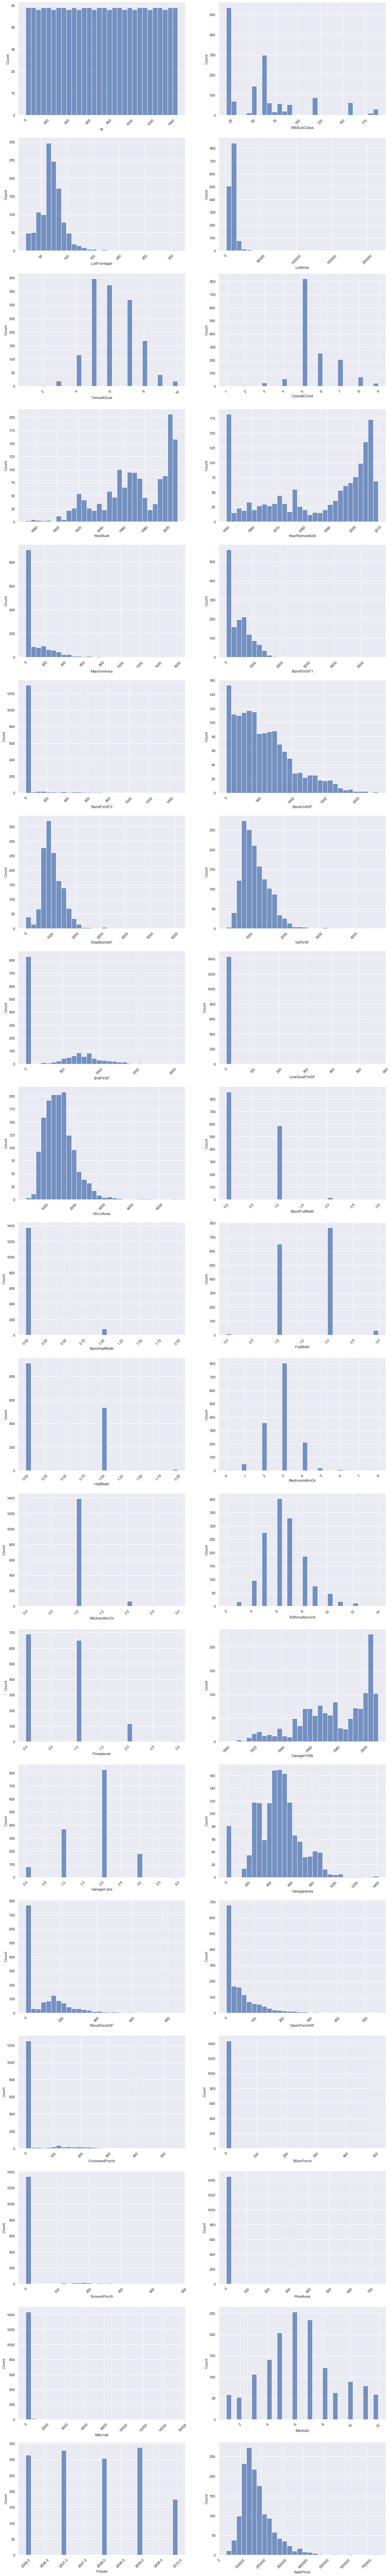

In [23]:
##distribution of numerical features
plt.figure(figsize=(20,150))
for i in enumerate(numerical_features):
    plt.subplot(20,2,i[0]+1)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=df,x=i[1],bins=30)
    plt.xticks(rotation=45)

# Observastion


1.Numerical feature contains discreate as well as continuous features

2.Also datetime features are there in the numerical features

# 6.2 Discrete and Continous numerical features 

In [25]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature + ['ID']]
print("There are total {} discrete feature namely {}\n".format(len(discrete_features),discrete_features))

continous_feature=[feature for feature in numerical_features if feature not in discrete_features +["Id",'SalePrice']]
print("There are total {} continous feature namely {}".format(len(continous_feature),continous_feature))

There are total 17 discrete feature namely ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']

There are total 19 continous feature namely ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold']


# 6.3 Relationship between discrete feature and SalePrice

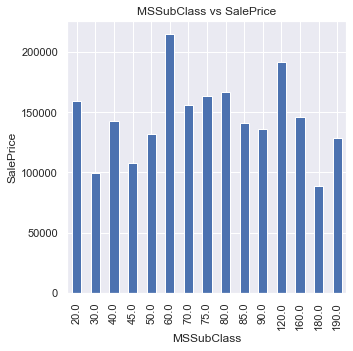

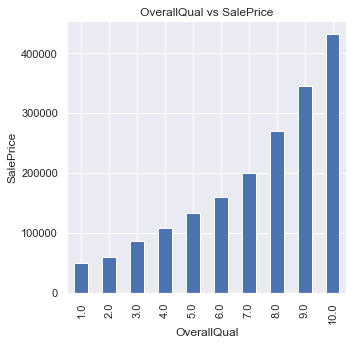

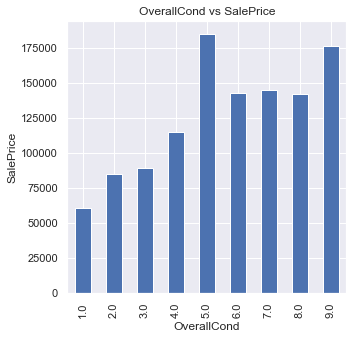

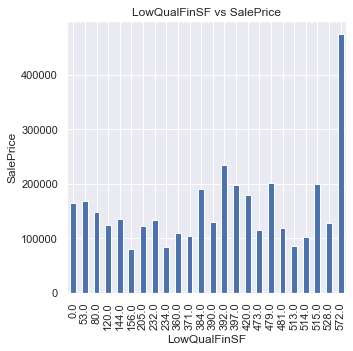

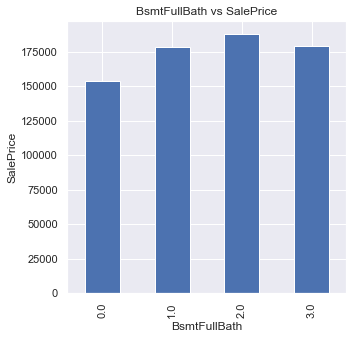

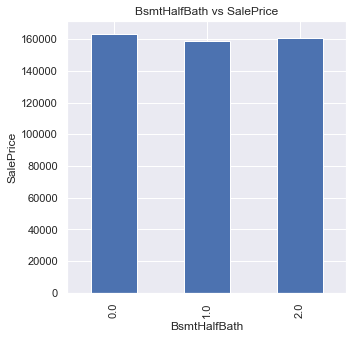

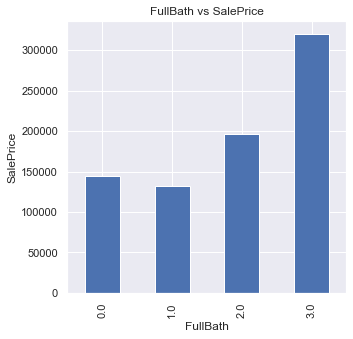

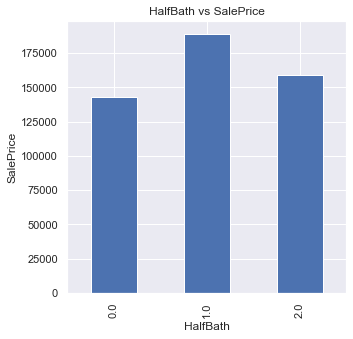

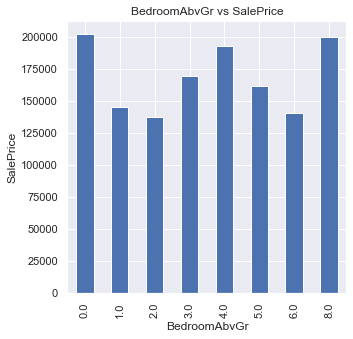

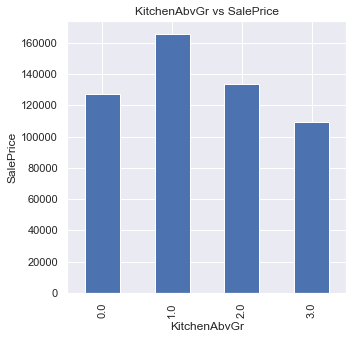

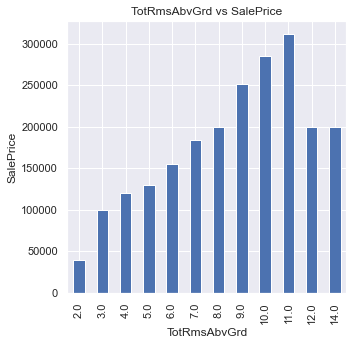

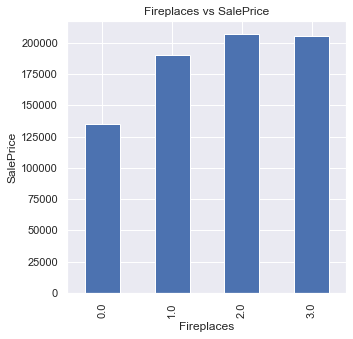

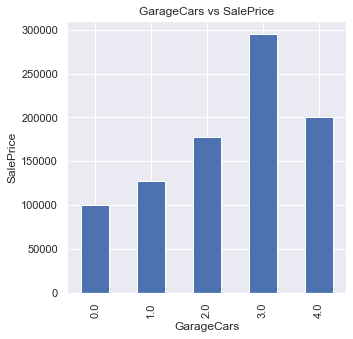

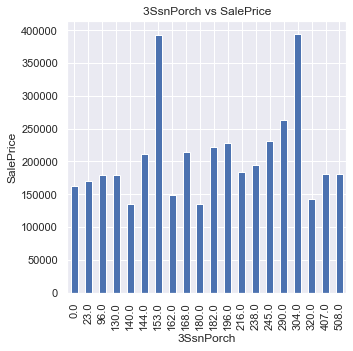

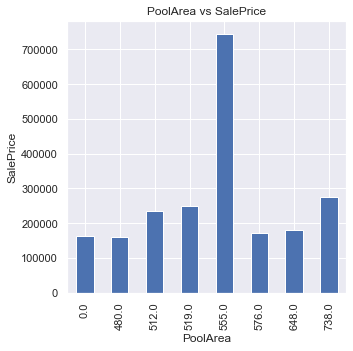

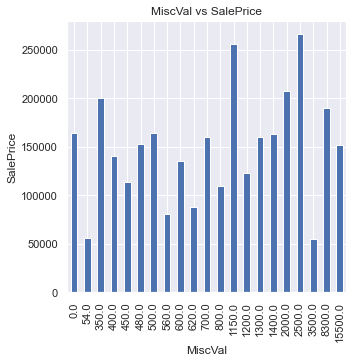

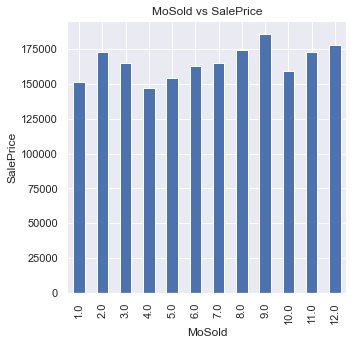

In [26]:
for feature in discrete_features:
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title("{} vs SalePrice".format(feature))
    plt.show();

# Observation

1.For MSSubClass, 2-STORY 1946 & NEWER has highest median value whereas PUD - MULTILEVEL - INCL SPLIT LEV/FOYER has least. Median values for other categories is comparable.

2.For OverallQual, Very Excellent has highest median value whereas Very Poor has least.

3.For OverallCond, Average has highest median value whereas Very Poor has least.

4.For LowQualFinSF, 572 squarefeet has highest median value whereas 156 Squarefeet has least. Median values for other categories is comparable.

5.For BsmtFullBath, 2 bathrooms has highest median value whereas Zero bathroom has least. Median values for other categories is comparable.

6.For BsmtHalfBath, All categories has almost equal median.

7.For FullBath, 3 bathrooms has highest median value whereas 1 bathroom has least. Median values for other categories is comparable.

8.For HalfBath, 1 bathroom has highest median value whereas Zero bathroom has least. Median values for other categories is comparable.

9.For BedroomAbvGr, 8 and zero bedrooms has highest median value whereas 2 bedrooms has least. Median values for other categories is comparable.

10.For KitchenAbvGr, 1 Kitchen has highest median value whereas 3 Kitchens has least. Median values for other categories is comparable.

11.For TotRmsAbvGrd, 11 rooms has highest median value whereas 2 rooms has least. Median values for other categories is comparable.

12.For Fireplaces, 2 and 3 fireplaces has highest median value whereas o fireplaces has least. Median values for other categories is comparable.

13.For GarageCars, 3 car capacity has highest median value whereas Zero car capacity has least. Median values for other categories is comparable.

14.For 3SsnPorch, 153 and 304 squarefeet has highest median value whereas 180 squarefeet has least. Median values for other categories is comparable.

15.For PoolArea, 555 squarefeet has highest median value whereas all other categories has alomst equal median values.

16.For MoSold, all months have almost equal median value.

# 6.4Relationship between continous feature and salesprice

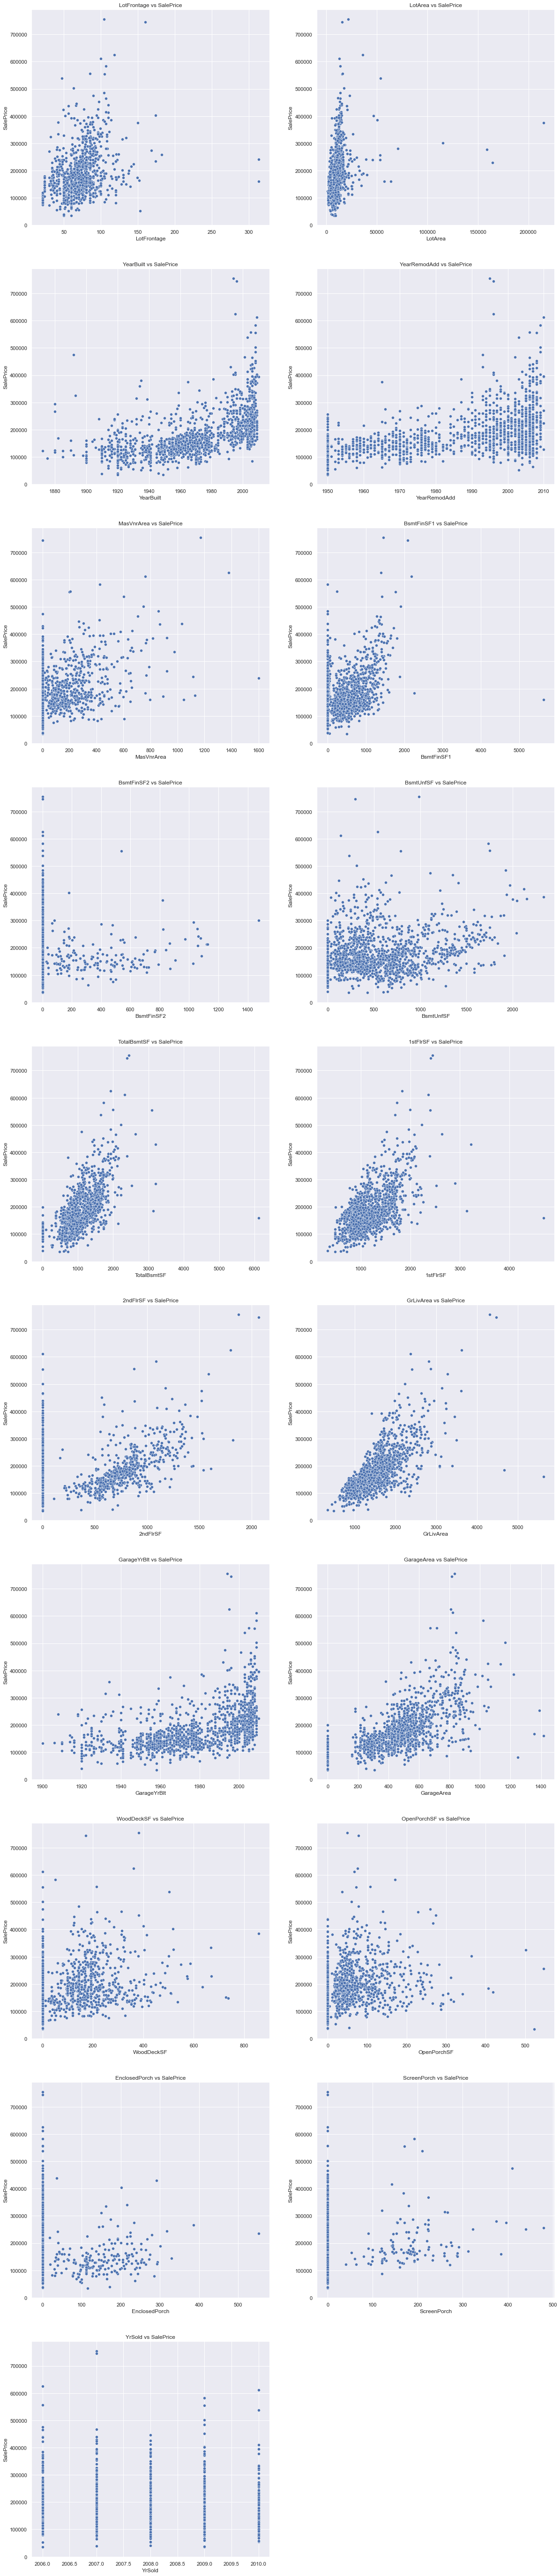

In [29]:
### Relationship between continuous feature and saleprice
plt.figure(figsize=(20,100))
for feature in enumerate(continous_feature):
    plt.subplot(10,2,feature[0]+1)
    sns.scatterplot(data=df, x=df[feature[1]], y=df['SalePrice'])
    plt.xlabel(feature[1])
    plt.ylabel('SalePrice')
    plt.title("{} vs SalePrice".format(feature[1]))
   

# Observation

1.LotFrontage has most of values between 0 to 150 feet of street length and median value of SalePrice between 0 to 4 lakh.

2.LotArea has most of the observations between 0 to 50K square feet lot Area and median value of SalePrice between 0 to 4 lakh.

3.MasVnrArea has most of the observations between 0 to 400 square feet Masonry veneer area and median value of SalePrice between 0 to 4 lakh.

4.BsmtFinSF1 has most of the observations between 0 to 1500 square feet Type 1 finished basement area and median value of SalePrice between 0 to 3 lakh.

5.BsmtFinSF2 has most of the observations as 0 square feet Type 2 finished basement area and median value of SalePrice between 0 to 2 lakh.

6.BsmtUnfSF has most of the observations between 0 to 1500 square feet Total basement area and median value of SalePrice between 0 to 3 lakh.

7.TotalBsmtSF has most of the observations between 0 to 2000 square feet basement unfinished area and median value of SalePrice between 0 to 3 lakh.

8.1stFlrSF has most of the observations between 0 to 2000 square feet First floor surface area and median value of SalePrice between 0 to 4 lakh.

9.2ndFlrSF has most of the observations between 0 to 1500 square feet Second floor surface area and median value of SalePrice between 0 to 3 lakh.

10.GrLivArea has most of the observations between 500 to 3000 square feet above ground living area and median value of SalePrice between 0 to 4 lakh.

11.GarageArea has most of the observations between 200 to 900 square feet Garage area and median value of SalePrice between 0 to 4 lakh.

12.WoodDeckSF has most of the observations between 0 to 400 square feet Wooddeck area and median value of SalePrice between 0 to 4 lakh.

13.OpenPorchSF has most of the observations between 0 to 200 square feet Open porch area and median value of SalePrice between 0 to 4 lakh.

14.EnclosedPorch has most of the observations between 0 to 300 square feet Enclosed porch area and median value of SalePrice between 0 to 2 lakh.

15.ScreenPorch has most of the observations between 0 to 300 square feet Screen porch area and median value of SalePrice between 0 to 3 lakh.

# 7.0 Outlier

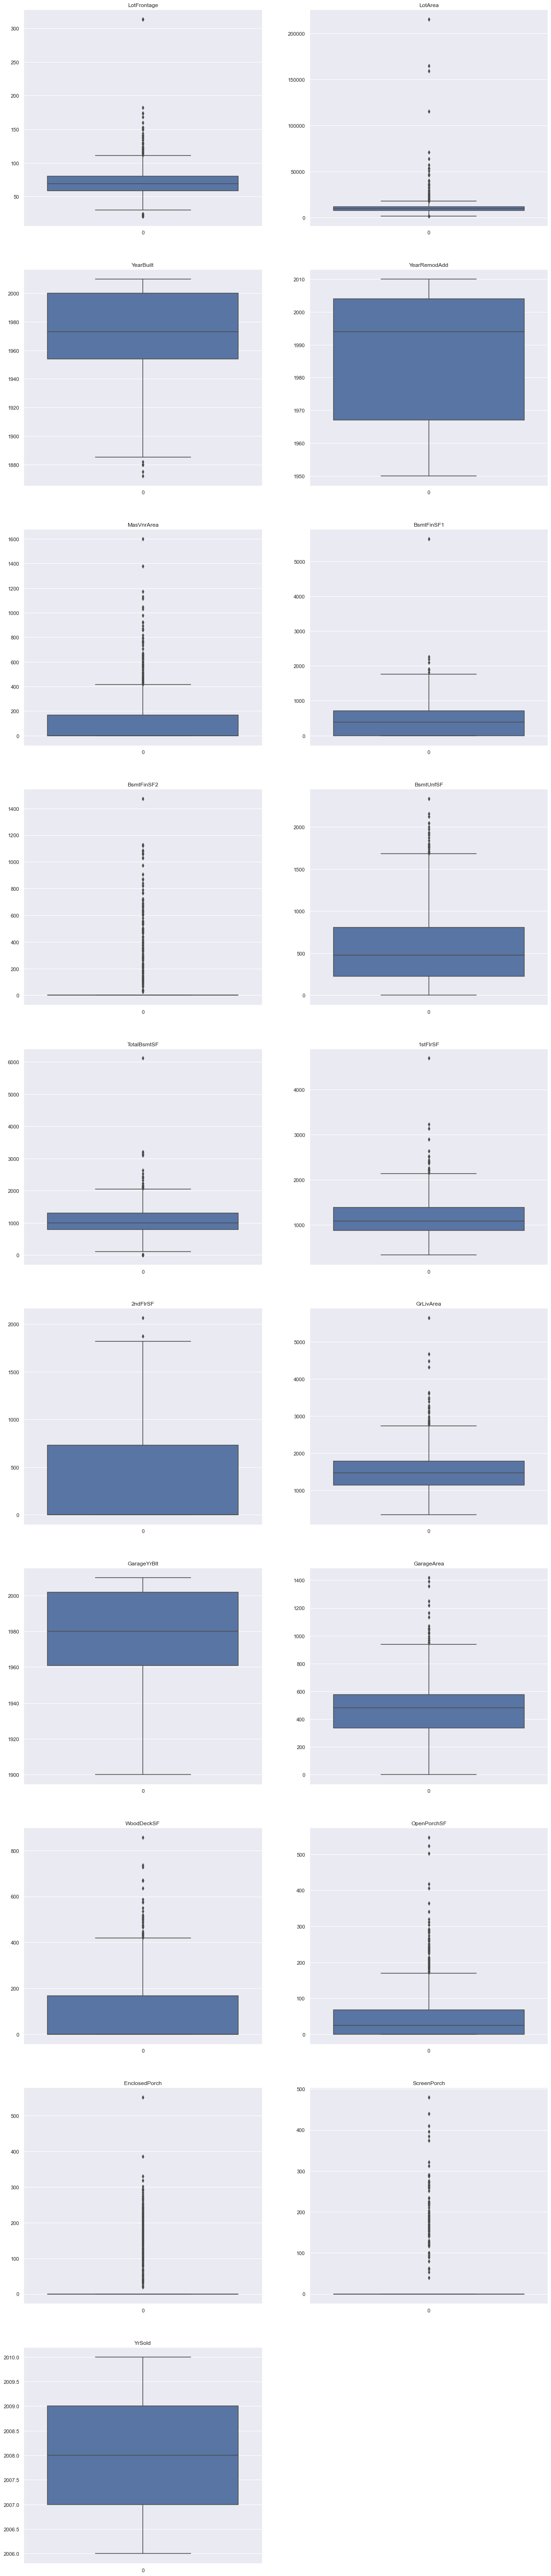

In [79]:
plt.figure(figsize=(20,100))
for feature in enumerate(continous_feature):
    plt.subplot(10,2,feature[0]+1)
    sns.boxplot(data=dataset[feature[1]])
    plt.title(feature[1])

# Observation

1.LotFrontage, LotArea and TotalBsmtSF has outliers below lower boundary and above upper boundary.

2.MasVnrArea, BsmtFinSF1, BsmtUnfSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, WoodDeckSF and OpenPorchSF has outliers above upper boundary.

3.BsmtFinSF2, EnclosedPorch and ScreenPorch have majority of values as outliers and those outliers are above upper boundary.

# 8.0 Correlation between Numerical feature and SalesPrice and Visualisation

8.1 Discrete feature vs SalePrice

In [81]:
corr_discreate=round(dataset[discrete_feature+['SalePrice']].corr(),2)
corr_discreate

MSSubClass  OverallQual  OverallCond  LowQualFinSF  \
MSSubClass          1.00         0.03        -0.06          0.05   
OverallQual         0.03         1.00        -0.09         -0.03   
OverallCond        -0.06        -0.09         1.00          0.03   
LowQualFinSF        0.05        -0.03         0.03          1.00   
BsmtFullBath        0.00         0.11        -0.05         -0.05   
BsmtHalfBath       -0.00        -0.04         0.12         -0.01   
FullBath            0.13         0.55        -0.19         -0.00   
HalfBath            0.18         0.27        -0.06         -0.03   
BedroomAbvGr       -0.02         0.10         0.01          0.11   
KitchenAbvGr        0.28        -0.18        -0.09          0.01   
TotRmsAbvGrd        0.04         0.43        -0.06          0.13   
Fireplaces         -0.05         0.40        -0.02         -0.02   
GarageCars         -0.04         0.60        -0.19         -0.09   
3SsnPorch          -0.04         0.03         0.03         -0.00   
PoolArea            0.01         0.07        -0.00          0.06   
MiscVal            -0.01        -0.03         0.07         -0.00   
MoSold             -0.01         0.07        -0.00         -0.02   
SalePrice          -0.08         0.79        -0.08         -0.03   

              BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
MSSubClass            0.00         -0.00      0.13      0.18         -0.02   
OverallQual           0.11         -0.04      0.55      0.27          0.10   
OverallCond          -0.05          0.12     -0.19     -0.06          0.01   
LowQualFinSF         -0.05         -0.01     -0.00     -0.03          0.11   
BsmtFullBath          1.00         -0.15     -0.06     -0.03         -0.15   
BsmtHalfBath         -0.15          1.00     -0.05     -0.01          0.05   
FullBath             -0.06         -0.05      1.00      0.14          0.36   
HalfBath             -0.03         -0.01      0.14      1.00          0.23   
BedroomAbvGr         -0.15          0.05      0.36      0.23          1.00   
KitchenAbvGr         -0.04         -0.04      0.13     -0.07          0.20   
TotRmsAbvGrd         -0.05         -0.02      0.55      0.34          0.68   
Fireplaces            0.14          0.03      0.24      0.20          0.11   
GarageCars            0.13         -0.02      0.47      0.22          0.09   
3SsnPorch            -0.00          0.04      0.04     -0.00         -0.02   
PoolArea              0.07          0.02      0.05      0.02          0.07   
MiscVal              -0.02         -0.01     -0.01      0.00          0.01   
MoSold               -0.03          0.03      0.06     -0.01          0.05   
SalePrice             0.23         -0.02      0.56      0.28          0.17   

              KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  3SsnPorch  \
MSSubClass            0.28          0.04       -0.05       -0.04      -0.04   
OverallQual          -0.18          0.43        0.40        0.60       0.03   
OverallCond          -0.09         -0.06       -0.02       -0.19       0.03   
LowQualFinSF          0.01          0.13       -0.02       -0.09      -0.00   
BsmtFullBath         -0.04         -0.05        0.14        0.13      -0.00   
BsmtHalfBath         -0.04         -0.02        0.03       -0.02       0.04   
FullBath              0.13          0.55        0.24        0.47       0.04   
HalfBath             -0.07          0.34        0.20        0.22      -0.00   
BedroomAbvGr          0.20          0.68        0.11        0.09      -0.02   
KitchenAbvGr          1.00          0.26       -0.12       -0.05      -0.02   
TotRmsAbvGrd          0.26          1.00        0.33        0.36      -0.01   
Fireplaces           -0.12          0.33        1.00        0.30       0.01   
GarageCars           -0.05          0.36        0.30        1.00       0.04   
3SsnPorch            -0.02         -0.01        0.01        0.04       1.00   
PoolArea             -0.01          0.08        0.10 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'MSSubClass'),
  Text(1.5, 0, 'OverallQual'),
  Text(2.5, 0, 'OverallCond'),
  Text(3.5, 0, 'LowQualFinSF'),
  Text(4.5, 0, 'BsmtFullBath'),
  Text(5.5, 0, 'BsmtHalfBath'),
  Text(6.5, 0, 'FullBath'),
  Text(7.5, 0, 'HalfBath'),
  Text(8.5, 0, 'BedroomAbvGr'),
  Text(9.5, 0, 'KitchenAbvGr'),
  Text(10.5, 0, 'TotRmsAbvGrd'),
  Text(11.5, 0, 'Fireplaces'),
  Text(12.5, 0, 'GarageCars'),
  Text(13.5, 0, '3SsnPorch'),
  Text(14.5, 0, 'PoolArea'),
  Text(15.5, 0, 'MiscVal'),
  Text(16.5, 0, 'MoSold'),
  Text(17.5, 0, 'SalePrice')])

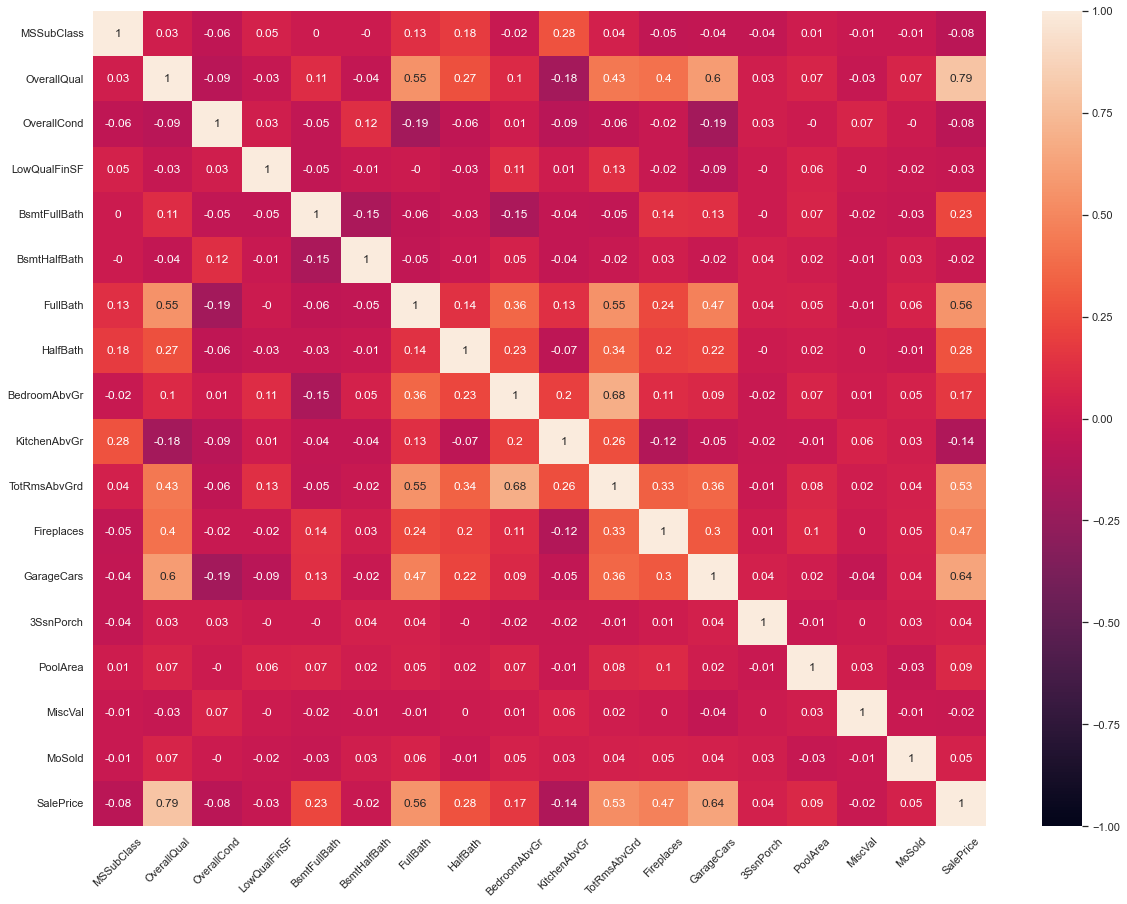

In [83]:
plt.figure(figsize=(20,15))
sns.heatmap(data=corr_discreate,annot=True,vmin=-1,vmax=1)
plt.xticks(rotation=45)

# Note(For both positive and negative side)

1. correlation coffecient between 0.9 and 1.0 very highly correlated

2. correlation coffecient between 0.7 and 0.9 very highly correlated

3. correlation coffecient between 0.5 and 0.7 moderately correlated

4. correlation coffecient between 0.3 and 0.5 low correlated

5. correlation coffecient between 0.3 little correlated



# Observation Target_feature=SalePrice

1.OverallQual is highly correlated with SalePrice.

2.FullBath, TotRmsAbvGrd and GarageCars is moderately correlated with SalePrice.

3.Fireplaces has low correlation with SalePrice.

4.MSSubClass, OverallCond, LowQualFinSF, BsmtFullBath, BsmtHalfBath, HalfBath, BedroomAbvGr, KitchenAbvGr, 3SsnPorch, PoolArea, MiscVal and MoSold has little correlation with SalePrice.

# Checking Multicolinearity

1.No independent features have Correlation value greater than 0.7

# 8.2 Continous feature vs SalePrice

In [30]:
corr_continous=round(df[continous_feature+['SalePrice']].corr(),2)
corr_continous

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage           1.00     0.43       0.12          0.09        0.19   
LotArea               0.43     1.00       0.01          0.01        0.10   
YearBuilt             0.12     0.01       1.00          0.59        0.32   
YearRemodAdd          0.09     0.01       0.59          1.00        0.18   
MasVnrArea            0.19     0.10       0.32          0.18        1.00   
BsmtFinSF1            0.23     0.21       0.25          0.13        0.26   
BsmtFinSF2            0.05     0.11      -0.05         -0.07       -0.07   
BsmtUnfSF             0.13    -0.00       0.15          0.18        0.11   
TotalBsmtSF           0.39     0.26       0.39          0.29        0.36   
1stFlrSF              0.46     0.30       0.28          0.24        0.34   
2ndFlrSF              0.08     0.05       0.01          0.14        0.17   
GrLivArea             0.40     0.26       0.20          0.29        0.39   
GarageYrBlt           0.07    -0.02       0.83          0.64        0.25   
GarageArea            0.34     0.18       0.48          0.37        0.37   
WoodDeckSF            0.09     0.17       0.22          0.21        0.16   
OpenPorchSF           0.15     0.08       0.19          0.23        0.13   
EnclosedPorch         0.01    -0.02      -0.39         -0.19       -0.11   
ScreenPorch           0.04     0.04      -0.05         -0.04        0.06   
YrSold                0.01    -0.01      -0.01          0.04       -0.01   
SalePrice             0.35     0.26       0.52          0.51        0.48   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
LotFrontage          0.23        0.05       0.13         0.39      0.46   
LotArea              0.21        0.11      -0.00         0.26      0.30   
YearBuilt            0.25       -0.05       0.15         0.39      0.28   
YearRemodAdd         0.13       -0.07       0.18         0.29      0.24   
MasVnrArea           0.26       -0.07       0.11         0.36      0.34   
BsmtFinSF1           1.00       -0.05      -0.50         0.52      0.45   
BsmtFinSF2          -0.05        1.00      -0.21         0.10      0.10   
BsmtUnfSF           -0.50       -0.21       1.00         0.42      0.32   
TotalBsmtSF          0.52        0.10       0.42         1.00      0.82   
1stFlrSF             0.45        0.10       0.32         0.82      1.00   
2ndFlrSF            -0.14       -0.10       0.00        -0.17     -0.20   
GrLivArea            0.21       -0.01       0.24         0.45      0.57   
GarageYrBlt          0.15       -0.09       0.19         0.32      0.23   
GarageArea           0.30       -0.02       0.18         0.49      0.49   
WoodDeckSF           0.20        0.07      -0.01         0.23      0.24   
OpenPorchSF          0.11        0.00       0.13         0.25      0.21   
EnclosedPorch       -0.10        0.04      -0.00        -0.10     -0.07   
ScreenPorch          0.06        0.09      -0.01         0.08      0.09   
YrSold               0.01        0.03      -0.04        -0.01     -0.01   
SalePrice            0.39       -0.01       0.21         0.61      0.61   

               2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  \
LotFrontage        0.08       0.40         0.07        0.34        0.09   
LotArea            0.05       0.26        -0.02        0.18        0.17   
YearBuilt          0.01       0.20         0.83        0.48        0.22   
YearRemodAdd       0.14       0.29         0.64        0.37        0.21   
MasVnrArea         0.17       0.39         0.25        0.37        0.16   
BsmtFinSF1        -0.14       0.21         0.15        0.30        0.20   
BsmtFinSF2        -0.10      -0.01        -0.09       -0.02        0.07   
BsmtUnfSF          0.00       0.24         0.19        0.18       -0.01   
TotalBsmtSF       -0.17       0.45         0.32        0.49        0.23   
1stFlrSF          -0.20       0.57         0.23        0.49        0.24   
2ndFlrSF         

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0.5, 0, 'LotFrontage'),
  Text(1.5, 0, 'LotArea'),
  Text(2.5, 0, 'YearBuilt'),
  Text(3.5, 0, 'YearRemodAdd'),
  Text(4.5, 0, 'MasVnrArea'),
  Text(5.5, 0, 'BsmtFinSF1'),
  Text(6.5, 0, 'BsmtFinSF2'),
  Text(7.5, 0, 'BsmtUnfSF'),
  Text(8.5, 0, 'TotalBsmtSF'),
  Text(9.5, 0, '1stFlrSF'),
  Text(10.5, 0, '2ndFlrSF'),
  Text(11.5, 0, 'GrLivArea'),
  Text(12.5, 0, 'GarageYrBlt'),
  Text(13.5, 0, 'GarageArea'),
  Text(14.5, 0, 'WoodDeckSF'),
  Text(15.5, 0, 'OpenPorchSF'),
  Text(16.5, 0, 'EnclosedPorch'),
  Text(17.5, 0, 'ScreenPorch'),
  Text(18.5, 0, 'YrSold'),
  Text(19.5, 0, 'SalePrice')])

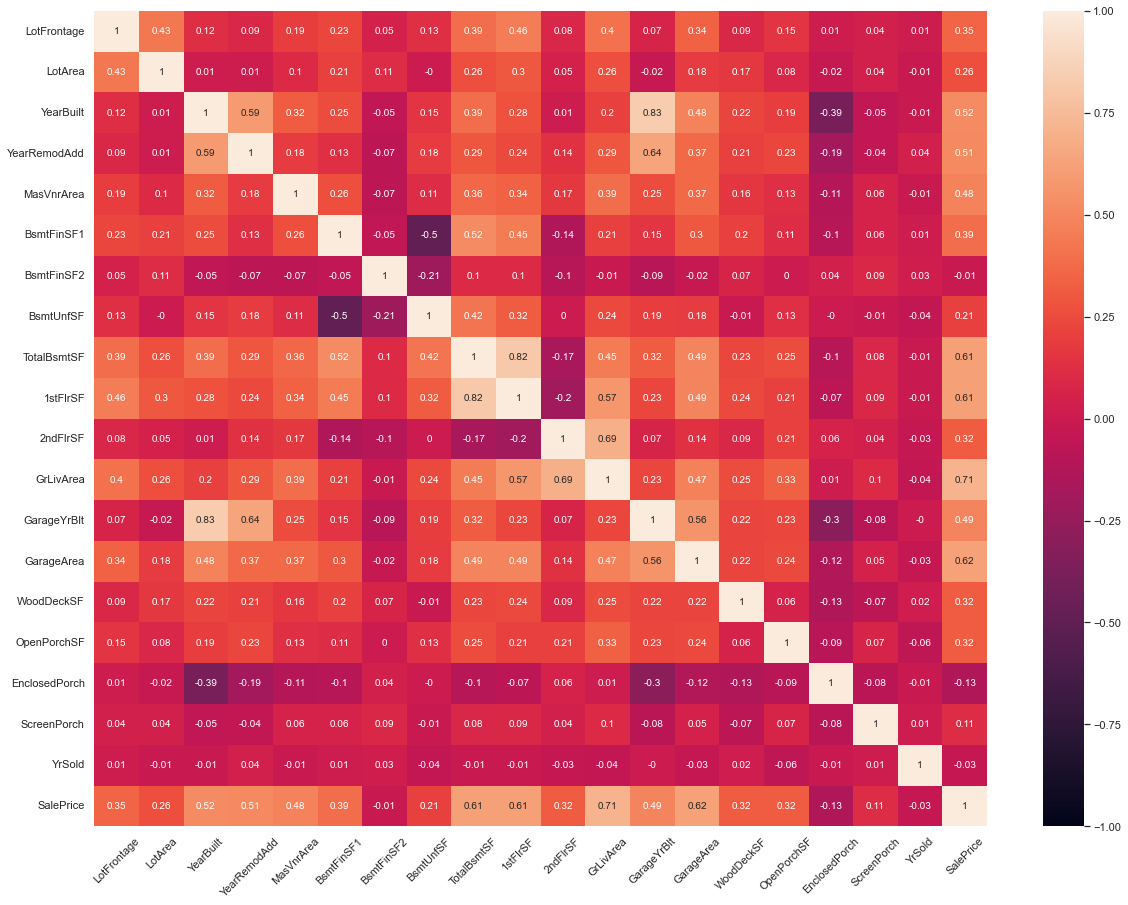

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(data=corr_continous,annot=True,vmin=-1,vmax=1)
plt.xticks(rotation=45)

# Observation

1.GrLivArea is highly correlated with SalePrice.

2.TotalBsmtSF, 1stFlrSF and GarageArea is moderately correlated with SalePrice.

3.BsmtFinSF1, 2ndFlrSF, WoodDeckSF and OpenPorchSF has low correlation with SalePrice.

4.LotArea, BsmtFinSF2, BsmtUnfSF, EnclosedPorch and ScreenPorch has little correlation with SalePrice.

# Checking multicollinearity

1.1stFlrSF and TotalBsmtSF are highly correlated.

2.All remaining features have correlation less than 0.7 with each other.

# 9.0 temporal feature

In [36]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

# YrSold v/s SalePrice

Text(0, 0.5, 'SalePrice')

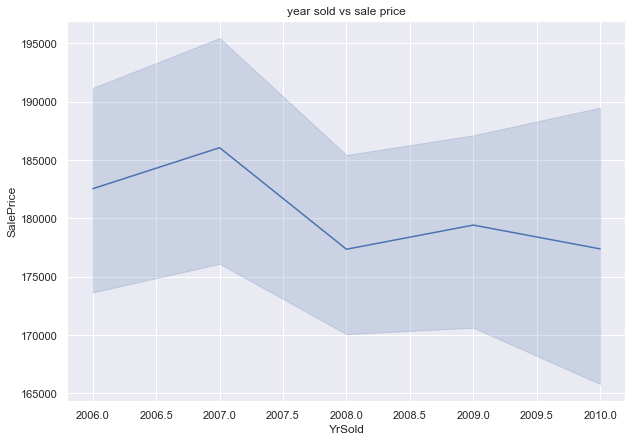

In [38]:
plt.figure(figsize=(10,7))
plt.title("year sold vs sale price")
sns.lineplot(data=df,x='YrSold',y='SalePrice',estimator='mean')
plt.xlabel('YrSold')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

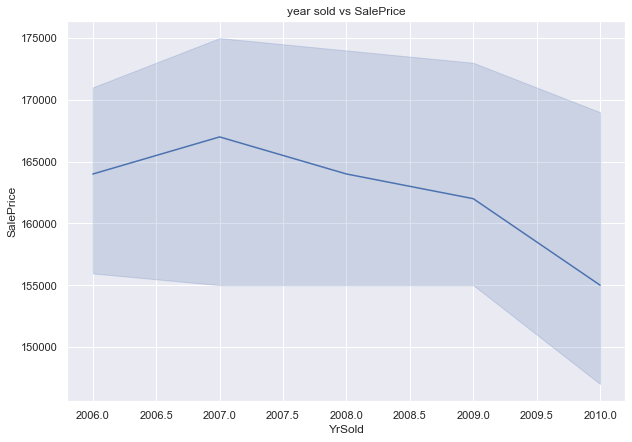

In [39]:
plt.figure(figsize=(10,7))
plt.title("year sold vs SalePrice")
sns.lineplot(data=df,x='YrSold',y='SalePrice',estimator=np.median)
plt.xlabel('YrSold')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

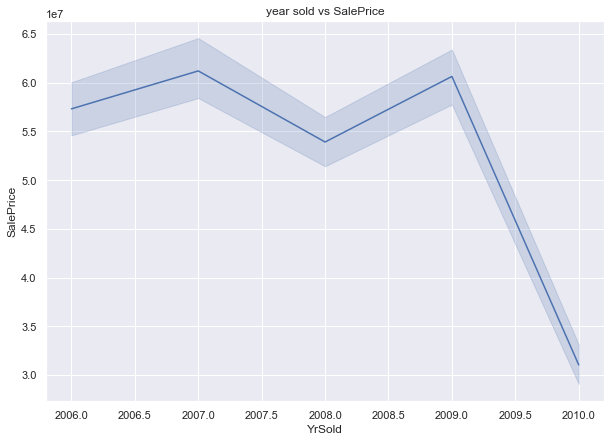

In [40]:
plt.figure(figsize=(10,7))
plt.title("year sold vs SalePrice")
sns.lineplot(data=df,x='YrSold',y='SalePrice',estimator='sum')
plt.xlabel('YrSold')
plt.ylabel('SalePrice')

# Observation

1.From first plot it is visible that average sales per year is on decline.

2.This can be confirmed from second graph.

3.From third graph, it is clearly visible that Total Sales is also on decline.

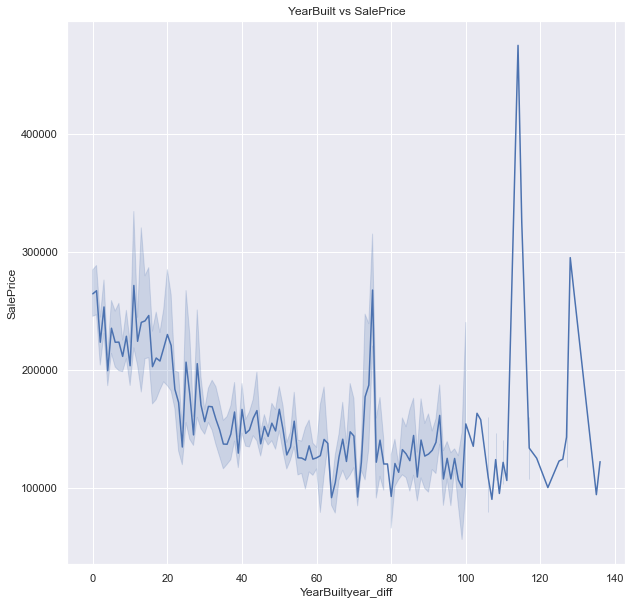

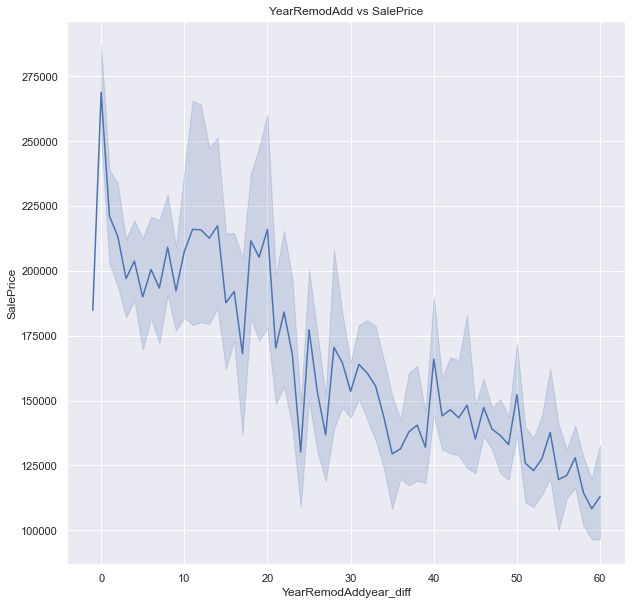

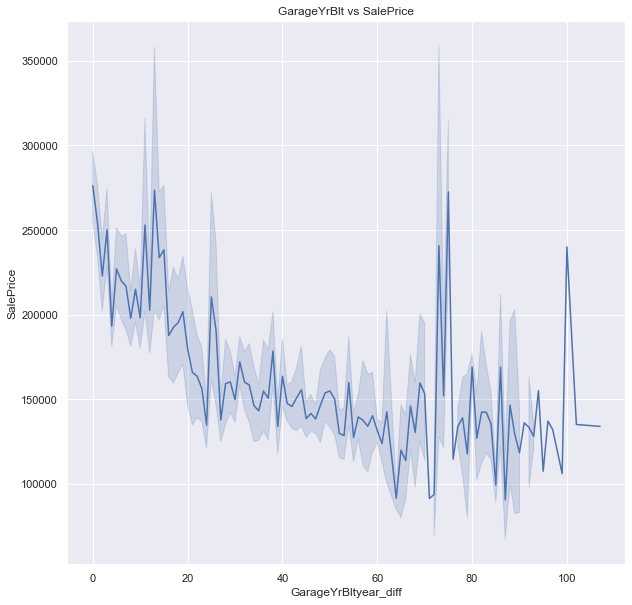

In [42]:
sns.set(rc={'figure.figsize':(10,10)})

data1 = df.copy()
for feature in year_feature:
    if feature!='YrSold':
        
        data1[feature+'year_diff']=data1['YrSold']-data1[feature]
        sns.lineplot(data=data1, x=data1[feature+'year_diff'], y='SalePrice')
        plt.title("{} vs SalePrice".format(feature))
        plt.show();   

# Observation

1.As the difference between YearBuilt and YrSold increases the SalePrice of house decreases.

2.As the difference between YearRemodAdd and YrSold increases the SalePrice of house decreases.

3.As the difference between GarageYrBlt and YrSold increases the SalePrice of house decreases.